# Statistical Data Modeling

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set some Pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)

# Estimation

An recurring statistical problem is finding estimates of the relevant parameters that correspond to the distribution that best represents our data.

In parametric inference, we specify a priori a suitable distribution, then choose the parameters that best fit the data.

e.g. $\mu$ and $\sigma^2$ in the case of the normal distribution

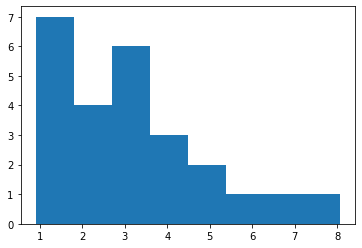

In [3]:
x = np.array([ 1.00201077,  1.58251956,  0.94515919,  6.48778002,  1.47764604,
        5.18847071,  4.21988095,  2.85971522,  3.40044437,  3.74907745,
        1.18065796,  3.74748775,  3.27328568,  3.19374927,  8.0726155 ,
        0.90326139,  2.34460034,  2.14199217,  3.27446744,  3.58872357,
        1.20611533,  2.16594393,  5.56610242,  4.66479977,  2.3573932 ])
_ = plt.hist(x, bins=8)

In [12]:
precip = pd.read_csv("neshville.txt", index_col=0, na_values='NA', delim_whitespace=True)
precip.head()

       Jan   Feb   Mar    Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
Year                                                                         
1871  2.76  4.58  5.01   4.13  3.30  2.98  1.58  2.36  0.95  1.31  2.13  1.65
1872  2.32  2.11  3.14   5.91  3.09  5.17  6.10  1.65  4.50  1.58  2.25  2.38
1873  2.96  7.14  4.11   3.59  6.31  4.20  4.63  2.36  1.81  4.28  4.36  5.94
1874  5.22  9.23  5.36  11.84  1.49  2.87  2.65  3.52  3.12  2.63  6.12  4.19
1875  6.15  3.06  8.14   4.22  1.73  5.63  8.12  1.60  3.79  1.25  5.46  4.30

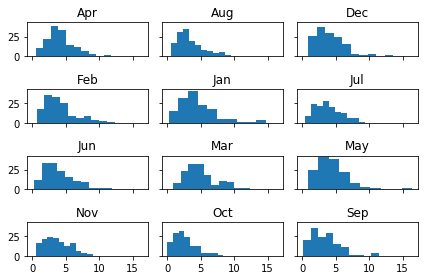

In [14]:
precip.hist(sharex=True, sharey=True, grid=False)
plt.tight_layout()

In [16]:
precip.fillna(value={'Oct': precip.Oct.mean()}, inplace=True)
precip

       Jan   Feb   Mar    Apr    May   Jun   Jul   Aug    Sep   Oct   Nov  \
Year                                                                        
1871  2.76  4.58  5.01   4.13   3.30  2.98  1.58  2.36   0.95  1.31  2.13   
1872  2.32  2.11  3.14   5.91   3.09  5.17  6.10  1.65   4.50  1.58  2.25   
1873  2.96  7.14  4.11   3.59   6.31  4.20  4.63  2.36   1.81  4.28  4.36   
1874  5.22  9.23  5.36  11.84   1.49  2.87  2.65  3.52   3.12  2.63  6.12   
1875  6.15  3.06  8.14   4.22   1.73  5.63  8.12  1.60   3.79  1.25  5.46   
...    ...   ...   ...    ...    ...   ...   ...   ...    ...   ...   ...   
2007  3.32  1.84  2.26   2.75   3.30  2.37  1.47  1.38   1.99  4.95  6.20   
2008  4.76  2.53  5.56   7.20   5.54  2.21  4.32  1.67   0.88  5.03  1.75   
2009  4.59  2.85  2.92   4.13   8.45  4.53  6.03  2.14  11.08  6.49  0.67   
2010  4.13  2.77  3.52   3.48  16.43  4.96  5.86  6.99   1.17  2.49  5.41   
2011  2.31  5.54  4.59   7.51   4.38  5.04  3.46  1.78   6.20  0.93  6.15   

In [17]:
precip_mean = precip.mean()
precip_mean

Jan    4.523688
Feb    4.097801
Mar    4.977589
Apr    4.204468
May    4.325674
Jun    3.873475
Jul    3.895461
Aug    3.367305
Sep    3.377660
Oct    2.610500
Nov    3.685887
Dec    4.176241
dtype: float64

In [18]:
precip_var = precip.var()
precip_var

Jan    6.928862
Feb    5.516660
Mar    5.365444
Apr    4.117096
May    5.306409
Jun    5.033206
Jul    3.777012
Aug    3.779876
Sep    4.940099
Oct    2.741659
Nov    3.679274
Dec    5.418022
dtype: float64

In [19]:
alpha_mom = precip_mean ** 2 / precip_var
beta_mom = precip_var / precip_mean

In [20]:
alpha_mom, beta_mom

(Jan    2.953407
 Feb    3.043866
 Mar    4.617770
 Apr    4.293694
 May    3.526199
 Jun    2.980965
 Jul    4.017624
 Aug    2.999766
 Sep    2.309383
 Oct    2.485616
 Nov    3.692511
 Dec    3.219070
 dtype: float64, Jan    1.531684
 Feb    1.346249
 Mar    1.077920
 Apr    0.979219
 May    1.226724
 Jun    1.299403
 Jul    0.969593
 Aug    1.122522
 Sep    1.462581
 Oct    1.050243
 Nov    0.998206
 Dec    1.297344
 dtype: float64)

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:316: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


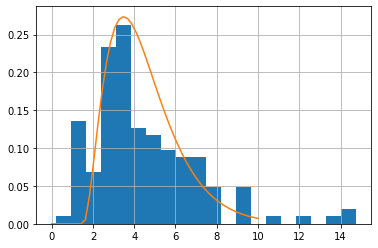

In [21]:
from scipy.stats.distributions import gamma

precip.Jan.hist(normed=True, bins=20)
plt.plot(np.linspace(0, 10), gamma.pdf(np.linspace(0, 10), alpha_mom[0], beta_mom[0]))

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:412: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(data[col].dropna().values, bins=bins, **kwds)


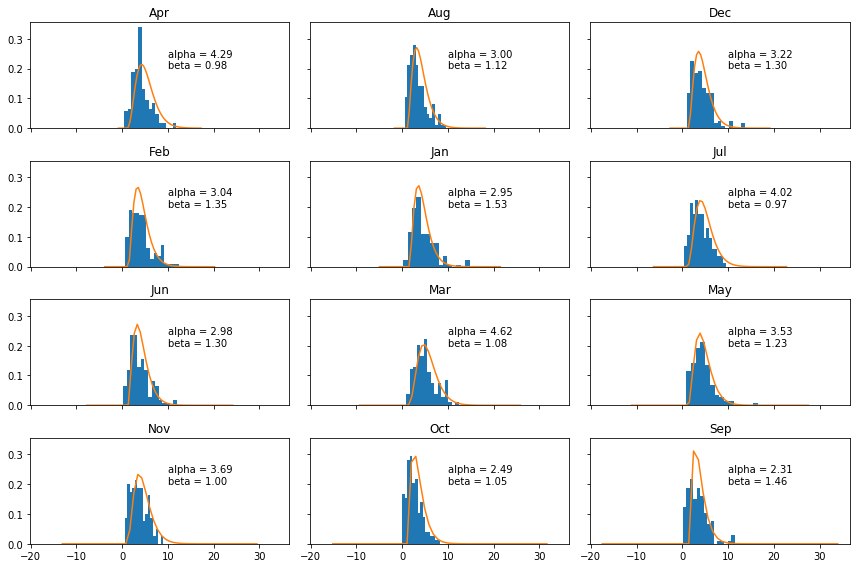

In [22]:
axs = precip.hist(normed=True, figsize=(12, 8), sharex=True, sharey=True, bins=15, grid=False)

for ax in axs.ravel():
    
    # Get month
    m = ax.get_title()
    
    # Plot fitted distribution
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, gamma.pdf(x, alpha_mom[m], beta_mom[m]))
    
    # Annotate with parameter estimates
    label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom[m], beta_mom[m])
    ax.annotate(label, xy=(10, 0.2))
    
plt.tight_layout()

# Maximum Likelihood

Maximum likelihood (ML) fitting is usually more work than the method of moments, but it is preferred as the resulting estimator is known to have good theoretical properties.

There is a ton of theory regarding ML. We will restrict ourselves to the mechanics here.

Say we have some data $y = y_1,y_2,\ldots,y_n$ that is distributed according to some distribution:

$$Pr(Y_i=y_i | \theta)$$
Here, for example, is a Poisson distribution that describes the distribution of some discrete variables, typically counts:

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


Text(0, 0.5, 'Pr(y)')

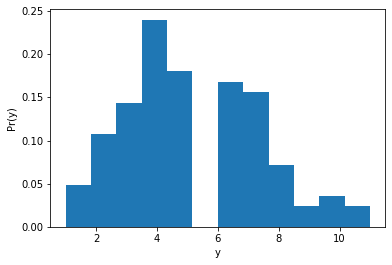

In [23]:
y = np.random.poisson(5, size=100)
plt.hist(y, bins=12, normed=True)
plt.xlabel('y'); plt.ylabel('Pr(y)')

In [24]:
poisson_like = lambda x, lam: np.exp(-lam) * (lam**x) / (np.arange(x)+1).prod()

lam = 6
value = 10
poisson_like(value, lam)

0.041303093412337726

In [25]:
np.sum(poisson_like(yi, lam) for yi in y)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  """Entry point for launching an IPython kernel.


11.582983580454911

In [26]:
lam = 8
np.sum(poisson_like(yi, lam) for yi in y)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


7.877980025226502

Text(0, 0.5, 'L($\\lambda$|x=5)')

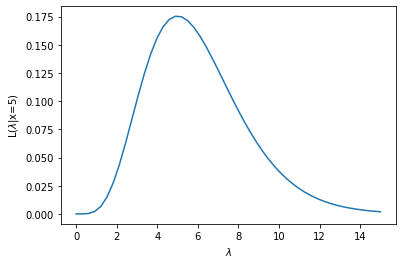

In [27]:
lambdas = np.linspace(0,15)
x = 5
plt.plot(lambdas, [poisson_like(x, l) for l in lambdas])
plt.xlabel('$\lambda$')
plt.ylabel('L($\lambda$|x={0})'.format(x))

How is the likelihood function different than the probability distribution function (PDF)? The likelihood is a function of the parameter(s) given the data, whereas the PDF returns the probability of data given a particular parameter value. Here is the PDF of the Poisson for $\lambda=5$.

Text(0, 0.5, 'Pr(X|$\\lambda$=5)')

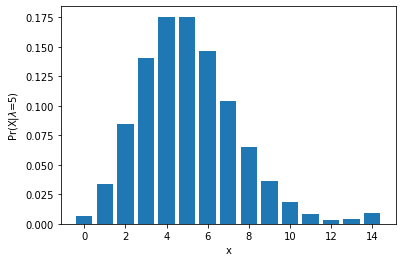

In [28]:
lam = 5
xvals = np.arange(15)
plt.bar(xvals, [poisson_like(x, lam) for x in xvals])
plt.xlabel('x')
plt.ylabel('Pr(X|$\lambda$=5)')

In [29]:
from scipy.optimize import newton

Here is a graphical example of how Newtone-Raphson converges on a solution, using an arbitrary function:

Text(1.4706070287539936, -0.2, '$x_{n+1}$')

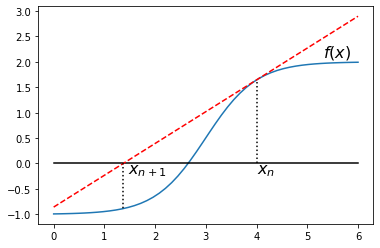

In [30]:
func = lambda x: 3./(1 + 400*np.exp(-2*x)) - 1
xvals = np.linspace(0, 6)
plt.plot(xvals, func(xvals))
plt.text(5.3, 2.1, '$f(x)$', fontsize=16)
# zero line
plt.plot([0,6], [0,0], 'k-')
# value at step n
plt.plot([4,4], [0,func(4)], 'k:')
plt.text(4, -.2, '$x_n$', fontsize=16)
# tangent line
tanline = lambda x: -0.858 + 0.626*x
plt.plot(xvals, tanline(xvals), 'r--')
# point at step n+1
xprime = 0.858/0.626
plt.plot([xprime, xprime], [tanline(xprime), func(xprime)], 'k:')
plt.text(xprime+.1, -.2, '$x_{n+1}$', fontsize=16)

To apply the Newton-Raphson algorithm, we need a function that returns a vector containing the first and second derivatives of the function with respect to the variable of interest. In our case, this is:

In [31]:
from scipy.special import psi, polygamma

dlgamma = lambda m, log_mean, mean_log: np.log(m) - psi(m) - log_mean + mean_log
dl2gamma = lambda m, *args: 1./m - polygamma(1, m)

In [32]:
log_mean = precip.mean().apply(np.log)
mean_log = precip.apply(np.log).mean()

In [33]:
alpha_mle = newton(dlgamma, 2, dl2gamma, args=(log_mean[-1], mean_log[-1]))
alpha_mle

3.5189679152399616

In [34]:
beta_mle = alpha_mle/precip.mean()[-1]
beta_mle

0.8426160754841373

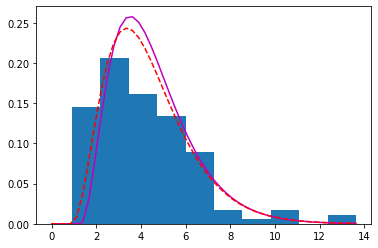

In [35]:
dec = precip.Dec
dec.hist(normed=True, bins=10, grid=False)
x = np.linspace(0, dec.max())
plt.plot(x, gamma.pdf(x, alpha_mom[-1], beta_mom[-1]), 'm-')
plt.plot(x, gamma.pdf(x, alpha_mle, beta_mle), 'r--')

In [36]:
from scipy.stats import gamma

gamma.fit(precip.Dec)

(2.242751775315231, 0.6549460447018862, 1.570073932063466)

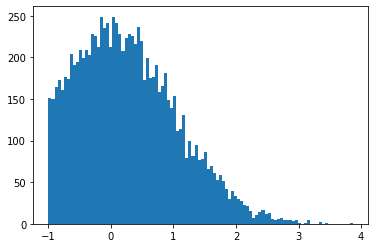

In [37]:
x = np.random.normal(size=10000)
a = -1
x_small = x < a
while x_small.sum():
    x[x_small] = np.random.normal(size=x_small.sum())
    x_small = x < a
    
_ = plt.hist(x, bins=100)

## Kernel density estimates

In some instances, we may not be interested in the parameters of a particular distribution of data, but just a smoothed representation of the data at hand. In this case, we can estimate the disribution non-parametrically (i.e. making no assumptions about the form of the underlying distribution) using kernel density estimation.

In [40]:
from scipy.stats.distributions import norm

trunc_norm = lambda theta, a, x: -(np.log(norm.pdf(x, theta[0], theta[1])) - 
                                      np.log(1 - norm.cdf(a, theta[0], theta[1]))).sum()

In [41]:
from scipy.optimize import fmin

fmin(trunc_norm, np.array([1,2]), args=(-1, x))

Optimization terminated successfully.
         Current function value: 246.332233
         Iterations: 53
         Function evaluations: 100


array([4.74955401, 3.16301745])

In [38]:
y = np.random.random(15) * 10
y

array([1.17128525, 3.59923494, 7.90733733, 0.79058822, 8.81958824,
       1.93866182, 1.00823019, 8.62957075, 1.16403922, 9.73166096,
       4.6026193 , 5.20252941, 6.63622804, 6.77568368, 9.9748027 ])

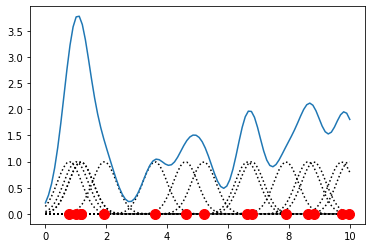

In [42]:
x = np.linspace(0, 10, 100)
# Smoothing parameter
s = 0.4
# Calculate the kernels
kernels = np.transpose([norm.pdf(x, yi, s) for yi in y])
plt.plot(x, kernels, 'k:')
plt.plot(x, kernels.sum(1))
plt.plot(y, np.zeros(len(y)), 'ro', ms=10)

In [43]:
x1 = np.random.normal(0, 3, 50)
x2 = np.random.normal(4, 1, 50)

# Append by row
x = np.r_[x1, x2]

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


(array([0.01822077, 0.04251514, 0.0728831 , 0.04858873, 0.09717746,
        0.22472289, 0.09717746, 0.00607359]),
 array([-5.10496978, -3.45849753, -1.81202527, -0.16555301,  1.48091925,
         3.1273915 ,  4.77386376,  6.42033602,  8.06680827]),
 <a list of 8 Patch objects>)

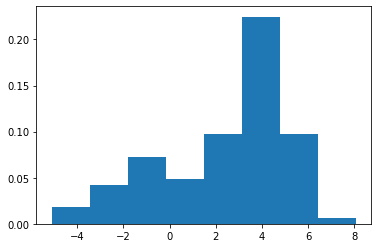

In [44]:
plt.hist(x, bins=8, normed=True)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


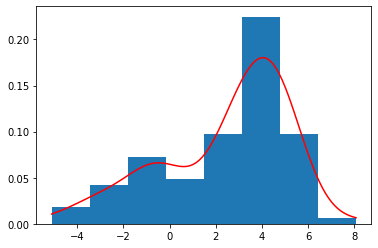

In [45]:
from scipy.stats import kde

density = kde.gaussian_kde(x)
xgrid = np.linspace(x.min(), x.max(), 100)
plt.hist(x, bins=8, normed=True)
plt.plot(xgrid, density(xgrid), 'r-')

# Regression models

A general, primary goal of many statistical data analysis tasks is to relate the influence of one variable on another. For example, we may wish to know how different medical interventions influence the incidence or duration of disease, or perhaps a how baseball player's performance varies as a function of age.

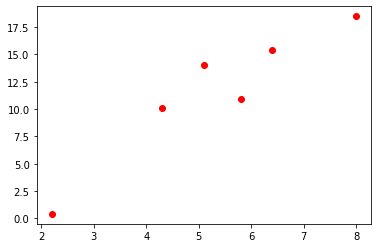

In [47]:
x = np.array([2.2, 4.3, 5.1, 5.8, 6.4, 8.0])
y = np.array([0.4, 10.1, 14.0, 10.9, 15.4, 18.5])
plt.plot(x,y,'ro')

We can build a model to characterize the relationship between $X$ and $Y$, recognizing that additional factors other than $X$ (the ones we have measured or are interested in) may influence the response variable $Y$.

$y_i = f(x_i) + \epsilon_i$
where $f$ is some function, for example a linear function:

$y_i = \beta_0 + \beta_1 x_i + \epsilon_i$
and $\epsilon_i$ accounts for the difference between the observed response $y_i$ and its prediction from the model $\hat{y_i} = \beta_0 + \beta_1 x_i$. This is sometimes referred to as process uncertainty.

We would like to select $\beta_0, \beta_1$ so that the difference between the predictions and the observations is zero, but this is not usually possible. Instead, we choose a reasonable criterion: the smallest sum of the squared differences between $\hat{y}$ and $y$.

$$R^2 = \sum_i (y_i - [\beta_0 + \beta_1 x_i])^2 = \sum_i \epsilon_i^2 $$
Squaring serves two purposes: (1) to prevent positive and negative values from cancelling each other out and (2) to strongly penalize large deviations. Whether the latter is a good thing or not depends on the goals of the analysis.

In other words, we will select the parameters that minimize the squared error of the model.

In [48]:
ss = lambda theta, x, y: np.sum((y - theta[0] - theta[1]*x) ** 2)

In [49]:
ss([0,1],x,y)

333.35

In [50]:
b0,b1 = fmin(ss, [0,1], args=(x,y))
b0,b1

Optimization terminated successfully.
         Current function value: 21.375000
         Iterations: 79
         Function evaluations: 153


(-4.350013603887088, 3.0000002915386412)

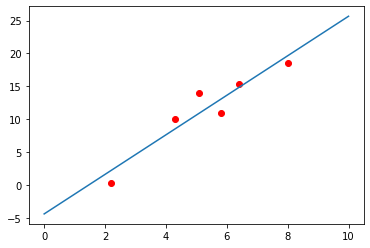

In [51]:
plt.plot(x, y, 'ro')
plt.plot([0,10], [b0, b0+b1*10])